# Dhwanil Shah

# The Sparks Foundation : Data Science and Business Analytics Internship

# Batch : April 2022

## Task - 5: Perform EDA on dataset 'Indian Premier League' and find out the most successful teams, players and factors contributing to the win or loss of a team.

In [1]:
#necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Deliveries Dataset

In [2]:
# reading the csv files
df_deliveries=pd.read_csv('E:\The_Sparks_Foundation\Task5\deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
# basic information of the dataset
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
# statistical information of all the numerical columns of the dataset
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [5]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Matches Dataset

In [6]:
# reading the csv files
df_matches=pd.read_csv('E:\The_Sparks_Foundation\Task5\matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
# basic information of the dataset
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# statistical information of all the numerical columns of the dataset
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## Combining dataset

In [10]:
all_data=df_deliveries.merge(df_matches[['id','season','winner']],left_on='match_id',right_on='id',how='inner')
all_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [11]:
all_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner'],
      dtype='object')

# Exploratory Data Analysis

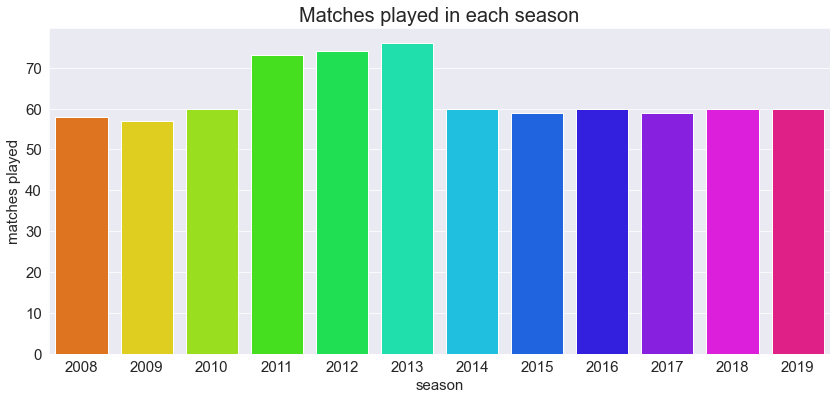

In [12]:
# number of matches played in each season
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.countplot(x='season',data=df_matches,palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('matches played',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches played in each season',fontsize=20)

plt.show()

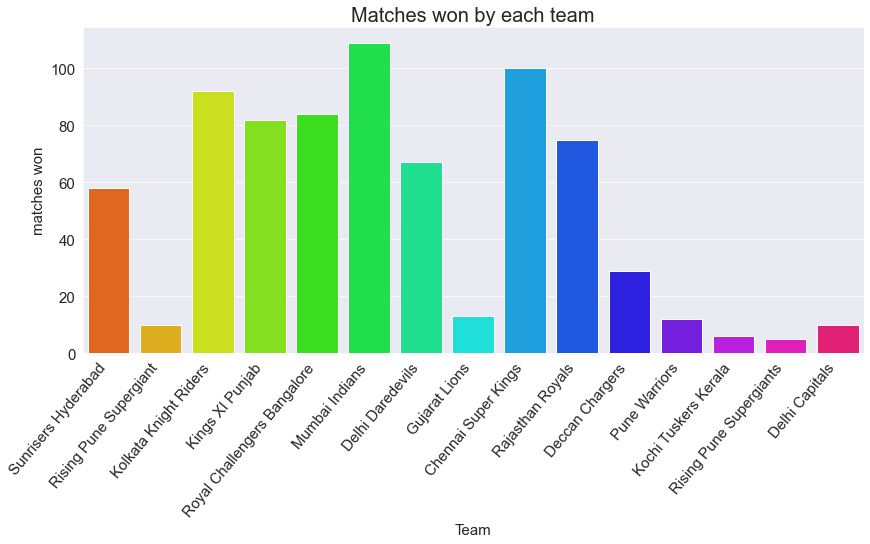

In [13]:
# number of matches won by each team
plt.figure(figsize=(14,6))
sns.countplot(x='winner',data=df_matches,palette='hsv')
plt.xlabel('Team',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Matches won by each team',fontsize=20)

plt.show()

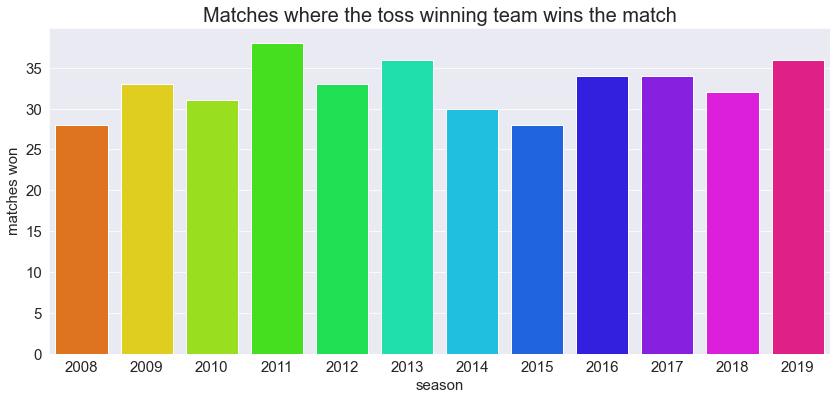

In [14]:
# number of matches where the toss wining team wins the match
plt.figure(figsize=(14,6))
sns.countplot(x='season',data=df_matches[df_matches['toss_winner']==df_matches['winner']],palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches where the toss winning team wins the match',fontsize=20)
plt.show()

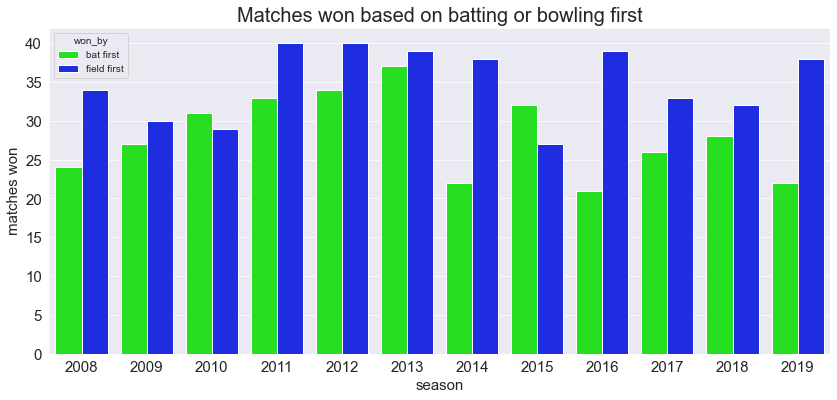

In [15]:
df_matches['won_by']=np.where(df_matches['win_by_runs']>0,'bat first','field first')

plt.figure(figsize=(14,6))
sns.countplot(x='season',data=df_matches,hue='won_by',palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches won based on batting or bowling first',fontsize=20)
plt.show()

In the past few years there is increasing trend of teams batting second winning more matches then those batting first. There might be many factors associated with these trends, one of them being the dew factor.

In [16]:
# number of matches won by each team in each season
with pd.option_context('display.max_rows', None):
   print(df_matches.groupby('season')['winner'].value_counts())

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [17]:
# most player of the match awards
df_matches['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [18]:
# different cities where ipl matches were played
df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

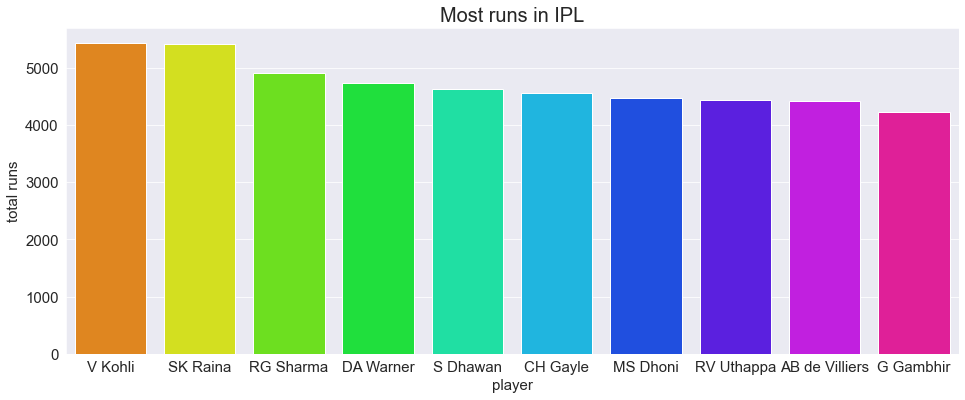

In [19]:
most_runs=df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
most_runs=most_runs.to_frame().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='batsman',y='batsman_runs',data=most_runs.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('total runs',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most runs in IPL',fontsize=20) 
plt.show()

In [20]:
most_runs_season=all_data.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_season=most_runs_season.to_frame().reset_index()
most_runs_season=most_runs_season.sort_values(by=['season','batsman_runs'],ascending=False)
most_runs_season=most_runs_season.drop_duplicates(['season'],keep='first')
most_runs_season

,season,batsman,batsman_runs
5,2019,DA Warner,727
2,2018,KS Williamson,747
11,2017,DA Warner,641
0,2016,V Kohli,973
25,2015,DA Warner,562
10,2014,RV Uthappa,660
4,2013,MEK Hussey,733
3,2012,CH Gayle,733
17,2011,CH Gayle,608
13,2010,SR Tendulkar,618


In [21]:
# most runs in a match
most_runs_match=all_data.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_match=most_runs_match.to_frame().reset_index()
most_runs_match[:10]

,match_id,batsman,batsman_runs
0,411,CH Gayle,175
1,60,BB McCullum,158
2,562,AB de Villiers,133
3,7935,RR Pant,130
4,620,AB de Villiers,129
5,372,CH Gayle,128
6,206,M Vijay,127
7,36,DA Warner,126
8,516,V Sehwag,122
9,7953,SR Watson,121


## Fours

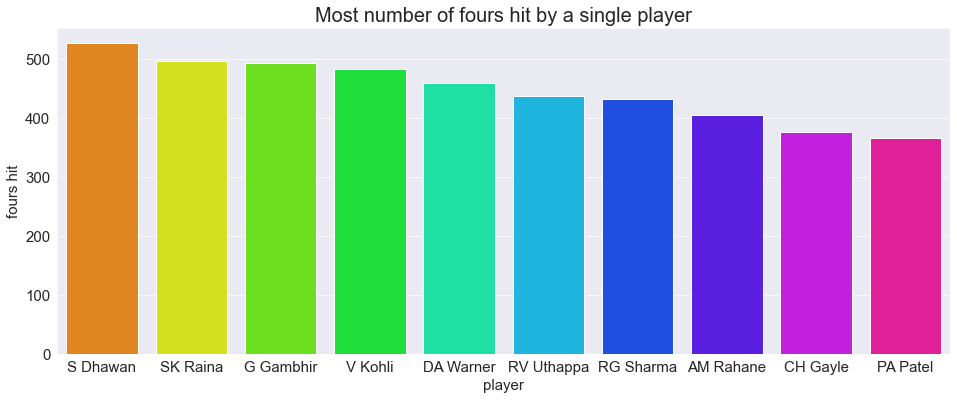

In [22]:
fours_hit=df_deliveries[df_deliveries['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
fours_hit=fours_hit.to_frame().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='batsman',y='batsman_runs',data=fours_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of fours hit by a single player',fontsize=20) 
plt.show()

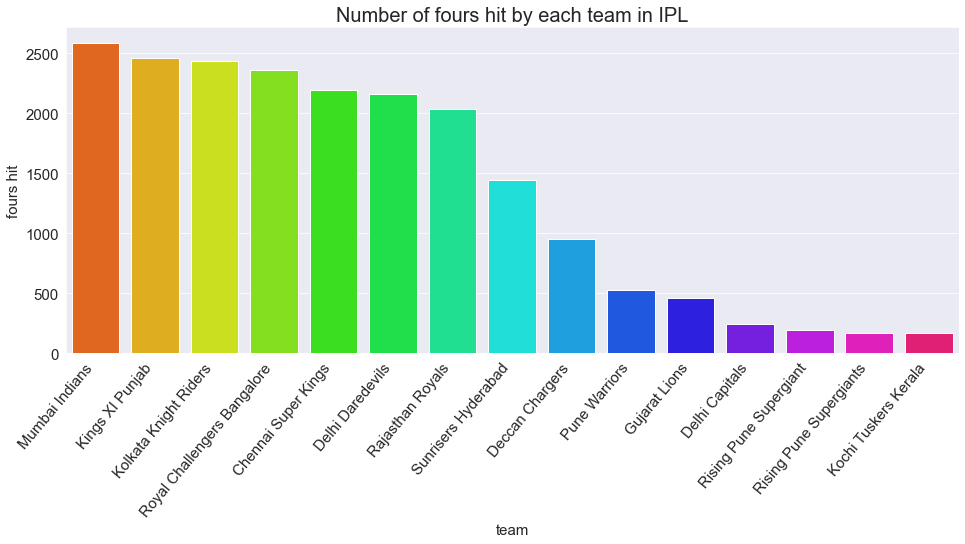

In [23]:
fours_team=df_deliveries[df_deliveries['batsman_runs']==4].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
fours_team=fours_team.to_frame().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='batting_team',y='batsman_runs',data=fours_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of fours hit by each team in IPL',fontsize=20) 
plt.show()

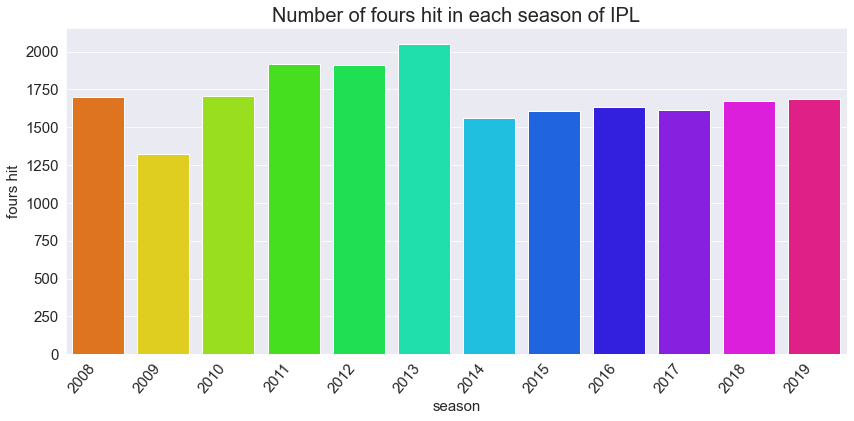

In [24]:
four_season=all_data[all_data['batsman_runs']==4].groupby('season')['batsman_runs'].count().sort_values(ascending=False)
four_season=four_season.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='season',y='batsman_runs',data=four_season,palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of fours hit in each season of IPL',fontsize=20) 
plt.show()

## Sixes

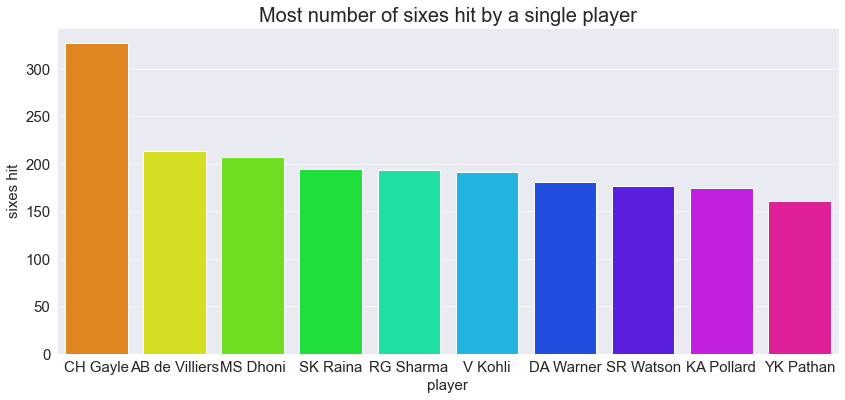

In [25]:
sixes_hit=df_deliveries[df_deliveries['batsman_runs']==6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
sixes_hit=sixes_hit.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='batsman',y='batsman_runs',data=sixes_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of sixes hit by a single player',fontsize=20) 
plt.show()

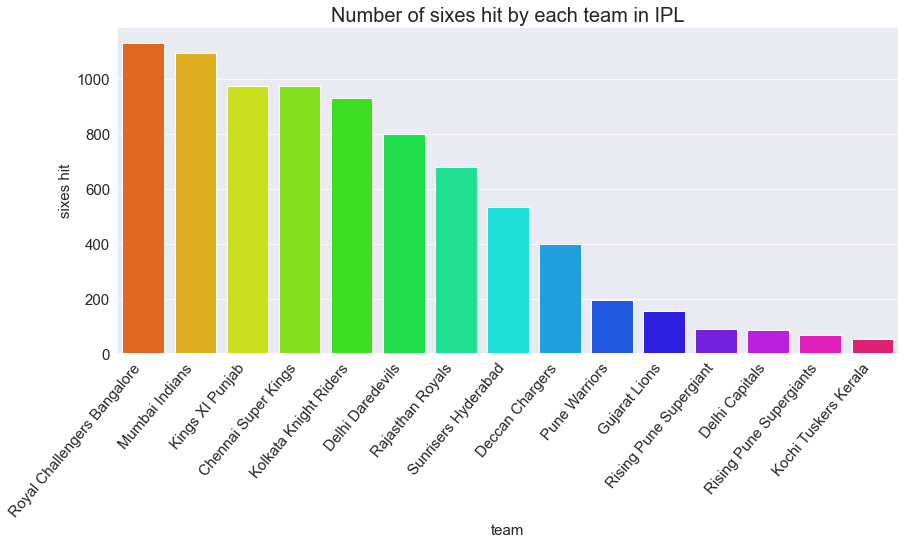

In [26]:
sixes_team=df_deliveries[df_deliveries['batsman_runs']==6].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
sixes_team=sixes_team.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='batting_team',y='batsman_runs',data=sixes_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of sixes hit by each team in IPL',fontsize=20) 
plt.show()

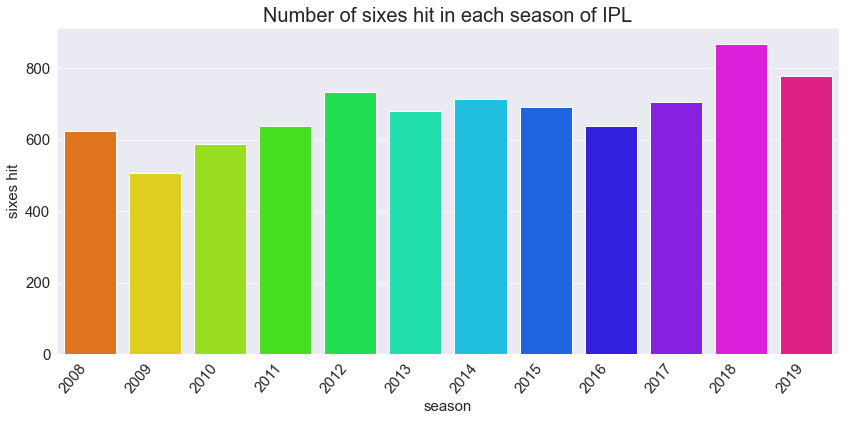

In [27]:
sixes_season=all_data[all_data['batsman_runs']==6].groupby('season')['batsman_runs'].count().sort_values(ascending=False)
sixes_season=sixes_season.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='season',y='batsman_runs',data=sixes_season,palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of sixes hit in each season of IPL',fontsize=20) 
plt.show()

## Bowling Statistics

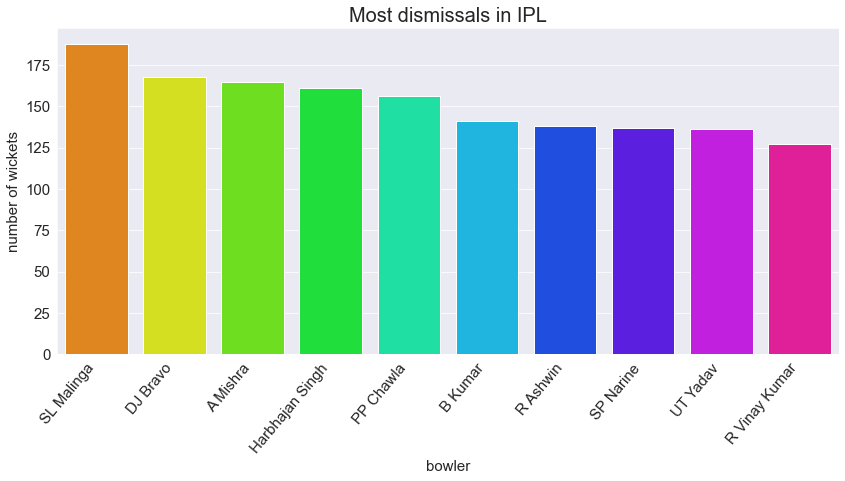

In [28]:
most_wickets=df_deliveries[df_deliveries['dismissal_kind'].notnull()]['bowler'].value_counts()
most_wickets=most_wickets.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='bowler',data=most_wickets[:10],palette='hsv')
plt.xlabel('bowler',fontsize=15)
plt.ylabel('number of wickets',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most dismissals in IPL',fontsize=20) 
plt.show()

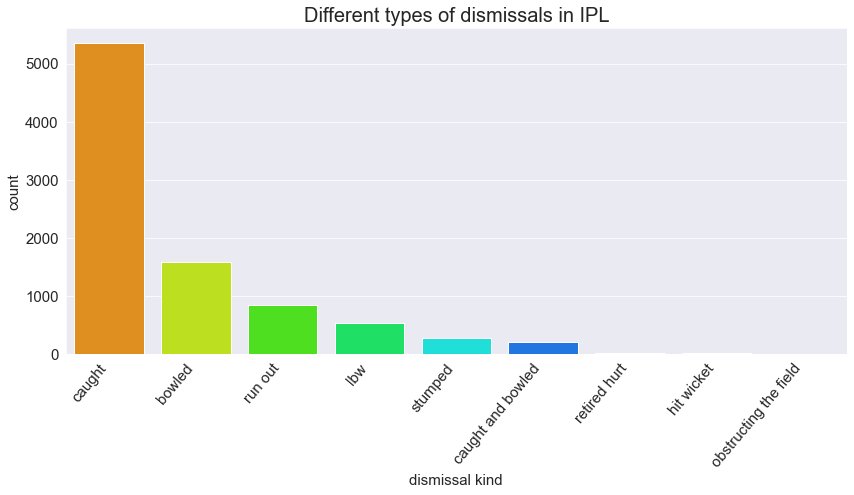

,index,dismissal_kind
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


In [29]:
out_methods=df_deliveries[df_deliveries['dismissal_kind'].notnull()]['dismissal_kind'].value_counts()
out_methods=out_methods.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='dismissal_kind',data=out_methods,palette='hsv')
plt.xlabel('dismissal kind',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Different types of dismissals in IPL',fontsize=20) 
plt.show()

out_methods

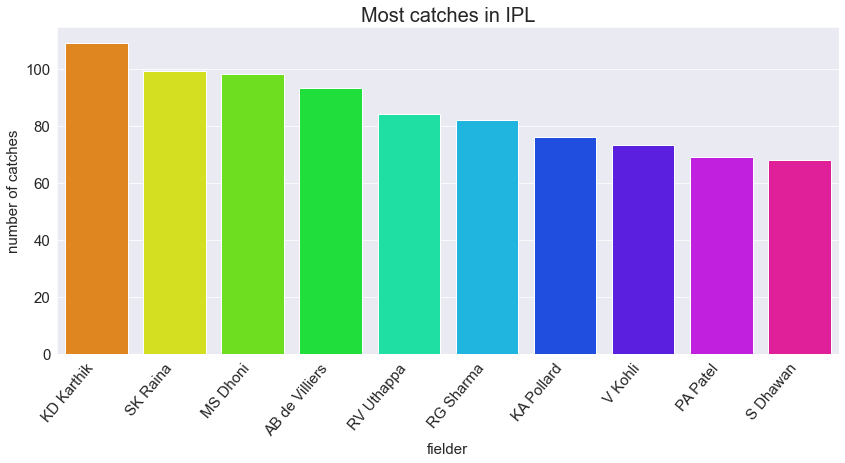

In [30]:
most_catches=df_deliveries[df_deliveries['dismissal_kind']=='caught']['fielder'].value_counts()
most_catches=most_catches.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_catches[:10],palette='hsv')
plt.xlabel('fielder',fontsize=15)
plt.ylabel('number of catches',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most catches in IPL',fontsize=20) 
plt.show()

From the graph above we can see that many of the players in the above list are keepers (Dinesh Karthik, MS Dhoni, AB de Villiers, PA Patel), which should have been the case because all the edges mostly get carried to the keeper.

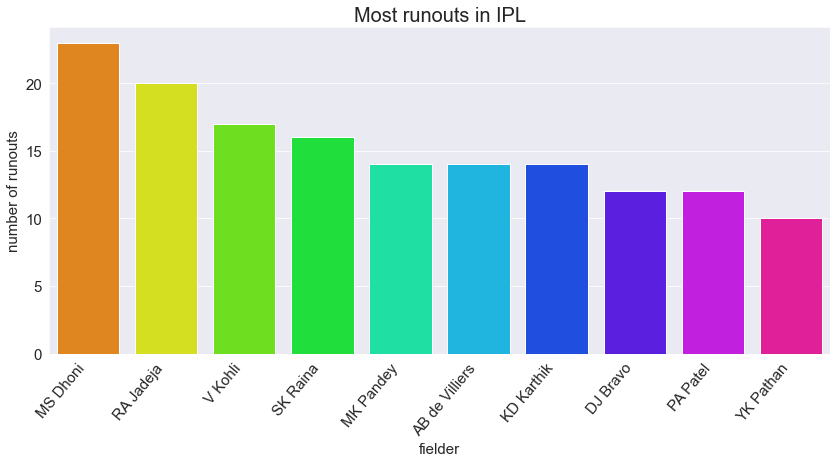

In [31]:
most_runouts=df_deliveries[df_deliveries['dismissal_kind']=='run out']['fielder'].value_counts()
most_runouts=most_runouts.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_runouts[:10],palette='hsv')
plt.xlabel('fielder',fontsize=15)
plt.ylabel('number of runouts',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most runouts in IPL',fontsize=20) 
plt.show()

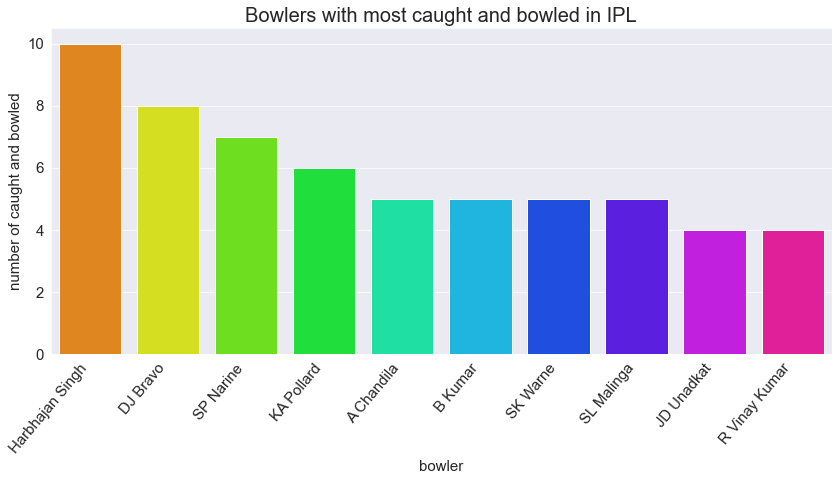

In [32]:
most_cb=df_deliveries[df_deliveries['dismissal_kind']=='caught and bowled']['bowler'].value_counts()
most_cb=most_cb.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='bowler',data=most_cb[:10],palette='hsv')
plt.xlabel('bowler',fontsize=15)
plt.ylabel('number of caught and bowled',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Bowlers with most caught and bowled in IPL',fontsize=20) 
plt.show()

From the above graph we can see that there are many spinners and medium pacers in the list. This is because fast bowlers have a very long follow through making it difficult for a caught and bowled chance

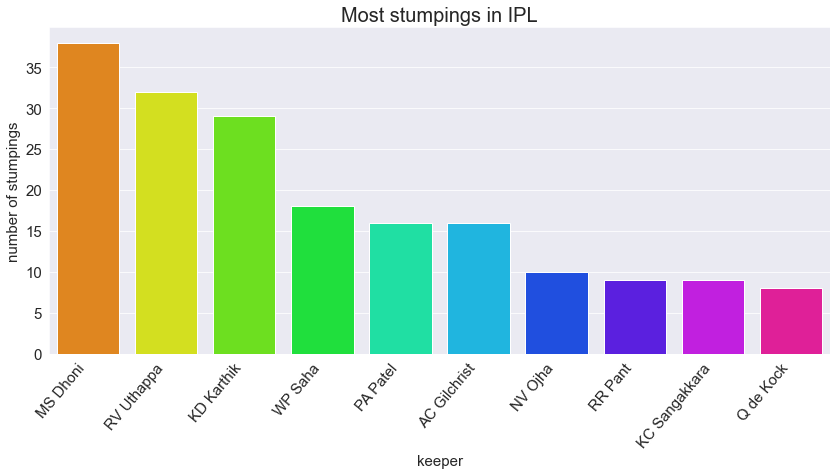

In [33]:
most_stumpings=df_deliveries[df_deliveries['dismissal_kind']=='stumped']['fielder'].value_counts()
most_stumpings=most_stumpings.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_stumpings[:10],palette='hsv')
plt.xlabel('keeper',fontsize=15)
plt.ylabel('number of stumpings',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most stumpings in IPL',fontsize=20) 
plt.show()

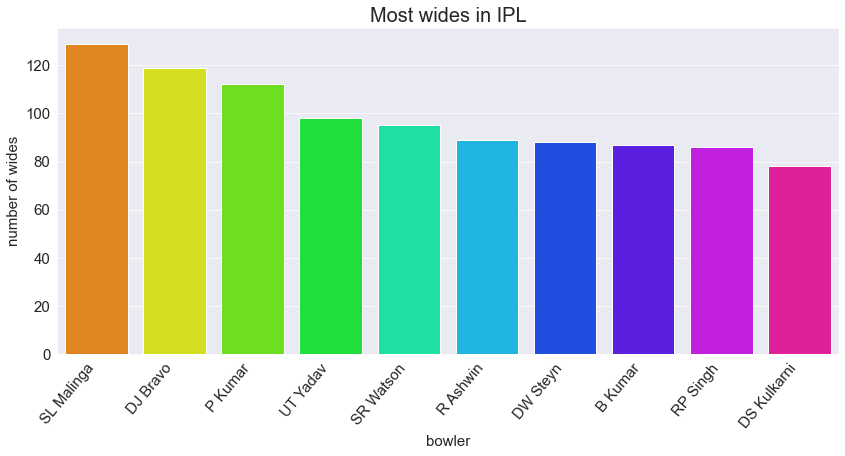

In [34]:
most_wides=df_deliveries[df_deliveries['wide_runs']!=0]['bowler'].value_counts()
most_wides=most_wides.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='bowler',data=most_wides[:10],palette='hsv')
plt.xlabel('bowler',fontsize=15)
plt.ylabel('number of wides',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most wides in IPL',fontsize=20) 
plt.show()

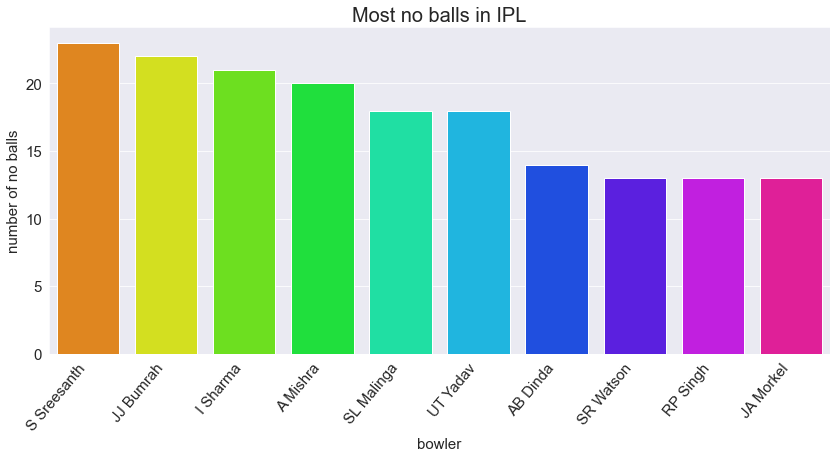

In [35]:
most_noballs=df_deliveries[df_deliveries['noball_runs']!=0]['bowler'].value_counts()
most_noballs=most_noballs.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='bowler',data=most_noballs[:10],palette='hsv')
plt.xlabel('bowler',fontsize=15)
plt.ylabel('number of no balls',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most no balls in IPL',fontsize=20) 
plt.show()

## Umpire Statistics

In [36]:
df_umpire=df_matches[['umpire1','umpire2']]
df_umpire.dropna(inplace=True)
df_umpire

,umpire1,umpire2
0,AY Dandekar,NJ Llong
1,A Nand Kishore,S Ravi
2,Nitin Menon,CK Nandan
3,AK Chaudhary,C Shamshuddin
5,A Deshmukh,NJ Llong
...,...,...
750,KN Ananthapadmanabhan,C Shamshuddin
751,Nanda Kishore,O Nandan
752,Nigel Llong,Nitin Menon
754,Sundaram Ravi,Bruce Oxenford


In [37]:
df_umpire['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
Nanda Kishore       1
SJA Taufel          1
A Nanda Kishore     1
SL Shastri          1
Sundaram Ravi       1
Name: umpire1, Length: 61, dtype: int64

In [38]:
df_umpire['umpire2'].value_counts()

C Shamshuddin       57
S Ravi              57
SJA Taufel          54
RJ Tucker           38
CK Nandan           36
                    ..
Kumar Dharmasena     1
SD Fry               1
SJ Davis             1
Subroto Das          1
Ian Gould            1
Name: umpire2, Length: 65, dtype: int64

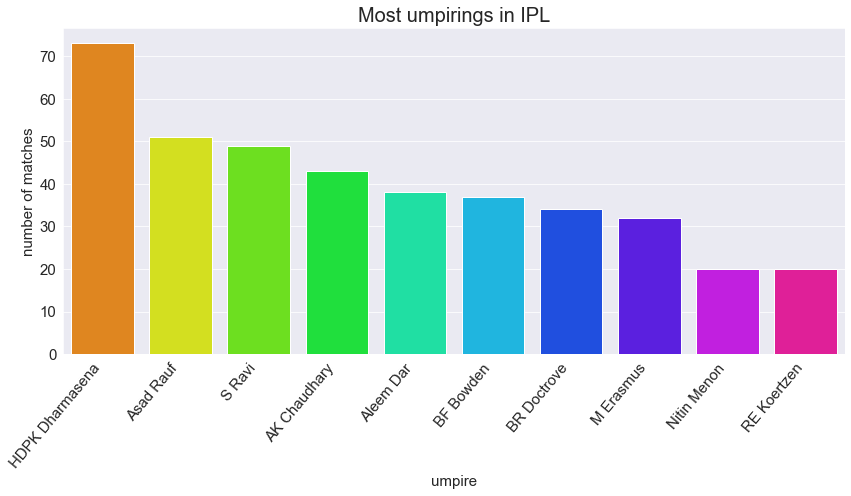

In [39]:
most_umpiring=df_umpire['umpire1'].value_counts()
most_umpiring=most_umpiring.to_frame().reset_index()
most_umpiring.columns=['umpire','count']

plt.figure(figsize=(14,6))
sns.barplot(x='umpire',y='count',data=most_umpiring[:10],palette='hsv')
plt.xlabel('umpire',fontsize=15)
plt.ylabel('number of matches',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most umpirings in IPL',fontsize=20) 
plt.show()

## Final's Statistics

In [40]:
# final matches in each season
final_matches=df_matches.drop_duplicates(['season'],keep='last').sort_values(['season'])
final_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,won_by
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,field first
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,bat first
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,bat first
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,bat first
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN,field first
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN,bat first
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,field first
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN,bat first
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,bat first
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,bat first


In [41]:
# winners of each season of ipl
final_matches[['season','winner']].sort_values(by=['season'])

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


In [42]:
# number of ipl titles with each team
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

From the above table we can see that Mumbai Indians is the most successfull team with 4 ipl titles, followed by Chennai Super Kings with 3 titles (till 2019).

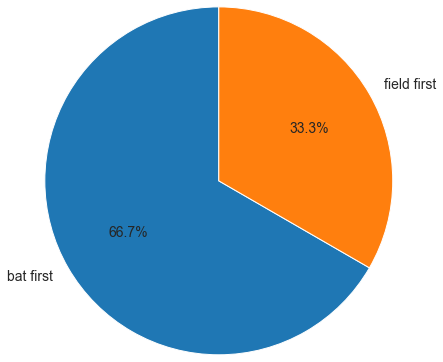

In [45]:
# pie chart showing finals won by batting first vs bowling first
size=[final_matches['won_by'].value_counts()['bat first'],final_matches['won_by'].value_counts()['field first']]
plt.pie(size,labels=['bat first','field first'],startangle=90, autopct='%1.1f%%',radius=2,textprops={'fontsize': 14})
plt.show()

## Final Conclusions

Most successful IPL team - Mumbai Indians (4 titles) <br><br>
Most runs in IPL - V Kohli (5434) <br>
Most runs in a single season of IPL - V Kohli (runs = 973, season - 2016) <br>
Orange cap winner for maximum times - DA Warner (3 times) <br>
Highest individual score in a match - CH Gayle (175) <br>

Most wickets in IPL - SL Malinga <br>
Most stumpings in IPL - MS Dhoni <br>
Most runouts in IPL - MS Dhoni <br>
Most catches in IPL - KD Karthik <br>